In [1]:
import pandas as pd
import seaborn as sns
import random

In [74]:
df = pd.read_csv("TacoBellCustomers.csv")

In [75]:
df

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,State_Purchased
0,0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Indiana
1,1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Kansas
2,2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Indiana
3,3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,South Carolina
4,4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Washington
...,...,...,...,...,...,...,...,...,...,...,...
10690,8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,North Carolina
10691,8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Arkansas
10692,8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Michigan
10693,8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Missouri


In [76]:
df = df[["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience", "Spending_Score", "Family_Size"]]

In [77]:
df.dropna(inplace = True)

C:\Users\abrain\AppData\Local\Temp\ipykernel_7072\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [78]:
df.reset_index(drop=True, inplace=True)

In [79]:
df["Low_Spending_Score"] = None
df["Average_Spending_Score"] = None
df["High_Spending_Score"] = None

C:\Users\abrain\AppData\Local\Temp\ipykernel_7072\3064481596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Low_Spending_Score"] = None
C:\Users\abrain\AppData\Local\Temp\ipykernel_7072\3064481596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Average_Spending_Score"] = None
C:\Users\abrain\AppData\Local\Temp\ipykernel_7072\3064481596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [80]:
df = df.replace("Yes", 1)
df = df.replace("No", 0)
df["Gender"] = df["Gender"].replace("Male", 1)
df["Gender"] = df["Gender"].replace("Female", 0)
for row in range(len(df)):
    if df.iat[row, 5] == "Low":
        df.iat[row, 7] = 1
        df.iat[row, 8] = 0
        df.iat[row, 9] = 0
    elif df.iat[row, 5] == "Average":
        df.iat[row, 7] = 0
        df.iat[row, 8] = 1
        df.iat[row, 9] = 0
    else:
        df.iat[row, 7] = 0
        df.iat[row, 8] = 0
        df.iat[row, 9] = 1
df = df[["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience", "Family_Size", "Low_Spending_Score", "Average_Spending_Score", "High_Spending_Score"]]
df = df.astype(float)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  9012 non-null   float64
 1   Ever_Married            9012 non-null   float64
 2   Age                     9012 non-null   float64
 3   Graduated               9012 non-null   float64
 4   Work_Experience         9012 non-null   float64
 5   Family_Size             9012 non-null   float64
 6   Low_Spending_Score      9012 non-null   float64
 7   Average_Spending_Score  9012 non-null   float64
 8   High_Spending_Score     9012 non-null   float64
dtypes: float64(9)
memory usage: 633.8 KB


In [82]:
def normalizingData (df):
    minMaxList = {}
    i = 0
    for column in df:
        minMaxList[i] = [df[column].max(), df[column].min()]
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())  
        i = i + 1
    return df, minMaxList

In [53]:
df, minMaxList = normalizingData (df)

In [12]:
def KMeansClustering (df, k, i):
    listOfKValues = []
    for kValue in range (3, k+1):
        listOfIterations = []
        listOfVarience = []
        for iterations in range(i):
            groups = randomGroups (df, kValue)
            groups = groupByPoint (df, groups)
            groups = findBestMatch (df, groups)
            groups = findMean(df, groups)
            groups, totalVarience = findVarience (df, groups)
            listOfIterations.append(groups)
            listOfVarience.append(totalVarience)
        lowestVariation = min(listOfVarience)
        index = listOfVarience.index(lowestVariation)
        bestIteration = listOfIterations[index]
        template = {"KValue":kValue, "Variation":lowestVariation, "BestIteration":bestIteration}
        listOfKValues.append(template)
        
    return listOfKValues

In [13]:
def findVarience (df, groups):
    totalVarience = 0
    for group in groups:
        varience = 0
        average = distanceMean(group)
        
        for row in group["GroupedRows"]:
            valueList = []
            for column in range(len(df.columns)):
                initial = group["Mean"][column]
                final = df.iat[row, column]
                value = (final-initial)**2
                valueList.append(value)
            valueSum = sum(valueList)
            distanceBetweenPoints = (valueSum)**0.5
            varient = (distanceBetweenPoints-average)**2
            varience = varience + varient 
        group["Variation"] = varience
        totalVarience = totalVarience + varience
    return groups, totalVarience

In [14]:
def distanceMean (group):
    totalDistance = []
    for row in group["GroupedRows"]:
        valueList = []
        for column in range(len(df.columns)):
            initial = group["Mean"][column]
            final = df.iat[row, column]
            value = (final-initial)**2
            valueList.append(value)
        valueSum = sum(valueList)
        distanceBetweenPoints = (valueSum)**0.5
        totalDistance.append(distanceBetweenPoints)
    totalDistance = sum(totalDistance)
    average = totalDistance/len(group["GroupedRows"])
    return average

In [15]:
def randomGroups (df, kValue):
    groups = []
    offLimits = []
    for group in range(kValue):
        randomRow = random.randrange(0, len(df.index)-1)
        if randomRow not in offLimits:
            offLimits.append(randomRow)
            template = {"Group": group, "StartingRow":randomRow, "GroupedRows":[], "Mean":[], "Variation":None}
            groups.append(template)
    return groups

In [16]:
def groupByPoint (df, groups):
    for row in range(len(df.index)):
        distanceGroup = []
        for group in groups:
            distanceBetweenPoints = euclideanDistance (df, row, group["StartingRow"])
            distanceGroup.append(distanceBetweenPoints)
        lowDistance = min(distanceGroup)
        index = distanceGroup.index(lowDistance)
        groups[index]["GroupedRows"].append(row)
    return groups

In [17]:
def euclideanDistance (df, row, startingRow):
    valueList = []
    for column in range(len(df.columns)):
        initial = df.iat[startingRow, column]
        final = df.iat[row, column]
        value = (final-initial)**2
        valueList.append(value)
    valueSum = sum(valueList)
    distanceBetweenPoints = (valueSum)**0.5
    return distanceBetweenPoints

In [18]:
def findMean(df, groups):
    for group in groups:
        meanList = []
        for column in range(len(df.columns)):
            total = 0
            for row in group["GroupedRows"]:
                total = total + df.iat[row, column]
            meanList.append(total/len(group["GroupedRows"]))
        group["Mean"] = meanList
    return groups

In [19]:
def findBestMatch (df, groups):
    groupsNotTheSame = True
    history = []
    while groupsNotTheSame == True:
        groups = findMean(df, groups)
        history.append(combineGroups(groups))
        for group in groups:
            group["GroupedRows"] = []
        groups = groupByMean (df, groups)
        if history[-1] == combineGroups(groups):
            groupsNotTheSame = False
    return groups

In [20]:
def combineGroups (groups):
    groupList = []
    for group in groups:
        template = {"Group":group["Group"], "GroupedRows":group["GroupedRows"]}
        groupList.append(template)
    return groupList

In [21]:
def groupByMean (df, groups):
    for row in range(len(df.index)):
        distanceGroup = []
        for group in groups:
            distanceBetweenMean = euclideanDistanceWithMean (df, row, group["Mean"])
            distanceGroup.append(distanceBetweenMean)
        lowDistance = min(distanceGroup)
        index = distanceGroup.index(lowDistance)
        groups[index]["GroupedRows"].append(row)
    return groups

In [22]:
def euclideanDistanceWithMean (df, row, mean):
    valueList = []
    for column in range(len(df.columns)):
        initial = mean[column]
        final = df.iat[row, column]
        value = (final-initial)**2
        valueList.append(value)
    valueSum = sum(valueList)
    distanceBetweenMean = (valueSum)**0.5
    return distanceBetweenMean

In [28]:
listOfKValues = KMeansClustering (df, 3, 2)

In [29]:
def makeElbowGraph (listOfKValues):
    elbowGraph = []
    for value in listOfKValues:
        template = {"Variation":value["Variation"], "KValue":value["KValue"]}
        elbowGraph.append(template)
    return elbowGraph

In [30]:
elbowGraph = makeElbowGraph (listOfKValues)

In [31]:
elbowGraph = pd.DataFrame.from_dict(elbowGraph)

In [32]:
elbowGraph.head()

,Variation,KValue
0,144.517453,3


<AxesSubplot:xlabel='KValue', ylabel='Variation'>

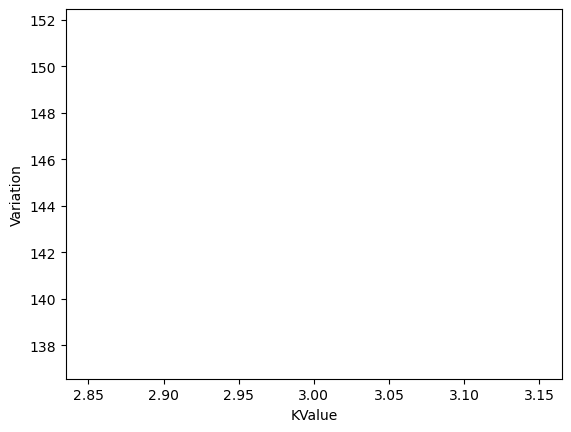

In [33]:
sns.lineplot(data=elbowGraph, x="KValue", y="Variation")

In [110]:
threeKValue = listOfKValues[0]["BestIteration"]

In [111]:
groupOne = threeKValue[0]
groupTwo = threeKValue[1]
groupThree = threeKValue[2]

In [57]:
def denormalizeData (mean, minMaxList):
    for value in range(len(mean)):
        mean[value] = (mean[value] * (minMaxList[value][0] - minMaxList[value][1])) + minMaxList[value][1]   
    return mean

In [58]:
groupOneMean = denormalizeData (groupOne["Mean"], minMaxList)
groupTwoMean = denormalizeData (groupTwo["Mean"], minMaxList)
groupThreeMean = denormalizeData (groupThree["Mean"], minMaxList)

In [102]:
print(groupOneMean)
print(groupTwoMean)
print(groupThreeMean)

[0.582737030411449, 1.0, 47.01923076923075, 0.7567084078711985, 2.428890876565294, 3.0872093023255816, 0.0, 1.0, 0.0]
[0.483695652173913, 0.0, 32.12201086956511, 0.5138586956521739, 3.0095108695651627, 3.002173913043478, 1.0, 0.0, 0.0]
[0.6082041343669251, 1.0, 54.487080103358984, 0.6821705426356589, 2.251614987080087, 2.4689922480620154, 0.5704134366925064, 0.0, 0.42958656330749356]


In [103]:
for columns in df:
    print(columns)

Gender
Ever_Married
Age
Graduated
Work_Experience
Family_Size
Low_Spending_Score
Average_Spending_Score
High_Spending_Score


In [152]:
len(groupOne["GroupedRows"])
#len(groupTwo["GroupedRows"])
#len(groupThree["GroupedRows"])

2236

In [156]:
vis = {"Group 1":[2236], "Group 2":[3680], "Group 3":[3096]}

In [157]:
vis = pd.DataFrame.from_dict(vis)

In [146]:
print(2236+3680+3096)

9012


In [133]:
visulaizationn = {"Low_Spending_Score":[], "Average_Spending_Score":[], "High_Spending_Score":[]}
for row in groupTwo["GroupedRows"]:
    if df["Low_Spending_Score"][row] == 1:
        visulaizationn["Low_Spending_Score"].append(1)
    elif df["Average_Spending_Score"][row] == 1:
        visulaizationn["Average_Spending_Score"].append(1)
    else:
        visulaizationn["High_Spending_Score"].append(1)

In [134]:
visulaizationn

{'Low_Spending_Score': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

In [135]:
for value in visulaizationn:
    if (visulaizationn[value]) == []:
        visulaizationn[value] = [0]
    else:
        visulaizationn[value] = [sum(visulaizationn[value])]

In [136]:
visulaizationn = pd.DataFrame.from_dict(visulaizationn)

In [137]:
visulaizationn

,Low_Spending_Score,Average_Spending_Score,High_Spending_Score
0,3680,0,0


<AxesSubplot:>

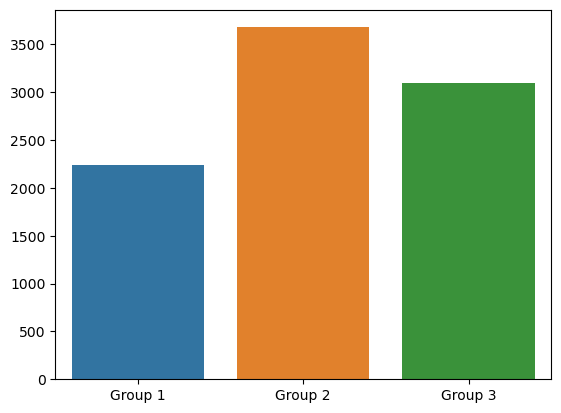

In [158]:
sns.barplot(data = vis)

In [ ]:
groupTwo[""]

In [69]:
groupOne

{'Group': 0,
 'StartingRow': 3855,
 'GroupedRows': [1,
  6,
  7,
  11,
  15,
  16,
  18,
  25,
  27,
  28,
  31,
  32,
  36,
  40,
  44,
  50,
  52,
  54,
  63,
  67,
  68,
  69,
  71,
  75,
  84,
  86,
  97,
  98,
  103,
  105,
  106,
  110,
  116,
  119,
  121,
  126,
  127,
  132,
  133,
  142,
  151,
  153,
  155,
  158,
  163,
  165,
  170,
  173,
  187,
  197,
  205,
  210,
  212,
  213,
  224,
  239,
  240,
  258,
  265,
  266,
  267,
  269,
  279,
  280,
  301,
  318,
  324,
  332,
  349,
  379,
  380,
  384,
  385,
  386,
  399,
  400,
  410,
  413,
  416,
  419,
  420,
  421,
  422,
  426,
  427,
  444,
  450,
  452,
  456,
  457,
  460,
  462,
  468,
  470,
  478,
  482,
  483,
  484,
  487,
  490,
  505,
  509,
  512,
  519,
  524,
  526,
  548,
  549,
  564,
  565,
  567,
  568,
  572,
  588,
  590,
  591,
  592,
  593,
  594,
  600,
  603,
  604,
  607,
  612,
  613,
  624,
  625,
  627,
  628,
  630,
  631,
  636,
  639,
  640,
  641,
  642,
  643,
  645,
  656,
  658,
 